In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

In [101]:
BATCH_SIZE = 32
NUM_CLASSES = 4
# EPOCHS = 50
LEARNING_RATE = 0.0001
SEED = 42

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)


In [102]:
train_transform = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.RandomHorizontalFlip(),
  transforms.RandomRotation(10),
  transforms.ColorJitter(0.2,0.2,0.2),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485,0.456,0.406],
                       std=[0.229,0.224,0.225])
])

test_transform = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485,0.456,0.406],
                       std=[0.229,0.224,0.225])
])

In [103]:
train_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [104]:
train_dir = "./dataset/train"

val_dir = "./dataset/val"
test_dir = "./dataset/test"

In [105]:
# # manual transform using our define transform

# train_data = datasets.ImageFolder(train_dir, transform=train_transform)

# val_data = datasets.ImageFolder(val_dir, transform=test_transform)
# test_data = datasets.ImageFolder(val_dir, transform=test_transform)

In [106]:
# # manual transform using our define transform
# train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
# test_loader = DataLoader(test_data, batch_size=BATCH_SIZE,shuffle=False, )

In [107]:
# train_loader, test_loader

In [108]:
# train_data.classes

In [109]:
import torchvision

In [110]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [111]:
# Get the transforms used to create our pretrained weights
auto_transform = weights.transforms()
auto_transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [112]:
# Automatic transform using pretrain models weights
train_data = datasets.ImageFolder(train_dir, transform=auto_transform)

val_data = datasets.ImageFolder(val_dir, transform=auto_transform)
test_data = datasets.ImageFolder(test_dir, transform=auto_transform)

In [113]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [114]:
train_loader, test_loader 

(<torch.utils.data.dataloader.DataLoader at 0x2d70580f070>,
 <torch.utils.data.dataloader.DataLoader at 0x2d70580f2e0>)

In [115]:
train_data.classes, train_data.class_to_idx

(['maruti_suzuki_baleno',
  'maruti_suzuki_brezza',
  'maruti_suzuki_swift',
  'maruti_suzuki_wagonr'],
 {'maruti_suzuki_baleno': 0,
  'maruti_suzuki_brezza': 1,
  'maruti_suzuki_swift': 2,
  'maruti_suzuki_wagonr': 3})

In [116]:
# # Get a set of pretrained model weights
# weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
# weights

In [117]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

In [118]:
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [119]:
# Get the transforms used to create our pretrained weights
auto_transform = weights.transforms()
auto_transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

#### Getting a summary of our model with torchinfo.summary()

In [120]:
# !pip install torchinfo

In [121]:
from torchinfo import summary

In [122]:
# Print a summary using torchinfo (uncomment for actual output)

summary(model=model,
        input_size=(32,3,224,224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=19,
        row_settings=["var_names"]
        )

Layer (type (var_name))                                      Input Shape         Output Shape        Param #             Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]   [32, 1000]          --                  True
├─Sequential (features)                                      [32, 3, 224, 224]   [32, 1280, 7, 7]    --                  True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]   [32, 32, 112, 112]  --                  True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]   [32, 32, 112, 112]  864                 True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]  [32, 32, 112, 112]  64                  True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]  [32, 32, 112, 112]  --                  --
│    └─Sequential (1)                                        [32, 32, 112, 112]  [32, 16, 112, 112]  --            

#### Freezing the base model and changing the output layer to suit our needs

The process of transfer learning usually goes: freeze some base layers of a pretrained model (typically the features section) and then adjust the output layers (also called head/classifier layers) to suit your needs.

We can freeze all of the layers/parameters in the features section by setting the attribute requires_grad=False.

For parameters with requires_grad=False, PyTorch doesn't track gradient updates and in turn, these parameters won't be changed by our optimizer during training.

In essence, a parameter with requires_grad=False is "untrainable" or "frozen" in place.

In [123]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for parms in model.features.parameters():
  parms.requires_grad = False

In [124]:
class_names = train_data.classes

In [125]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# get the length of class_names
output_shape = len(class_names)
# print(output_shape)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
  torch.nn.Dropout(p=0.2, inplace=True),
  torch.nn.Linear(in_features=1280,
                  out_features=output_shape,
                  bias=True)
).to(device)

In [126]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=19,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape         Output Shape        Param #             Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]   [32, 4]             --                  Partial
├─Sequential (features)                                      [32, 3, 224, 224]   [32, 1280, 7, 7]    --                  False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]   [32, 32, 112, 112]  --                  False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]   [32, 32, 112, 112]  (864)               False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]  [32, 32, 112, 112]  (64)                False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]  [32, 32, 112, 112]  --                  --
│    └─Sequential (1)                                        [32, 32, 112, 112]  [32, 16, 112, 112]  --     

### Train model

In [127]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [128]:
from tqdm.auto import tqdm

#### Define an EarlyStopping Class

In [129]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        """
        Args:
          patience (int): How many epochs to wait after last time validation loss improved.
          min_delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.counter = 0
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0  # reset counter if validation loss improved
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


In [130]:
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval() 

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          early_stopping: EarlyStopping = None) -> Dict[str, List]:

    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }
    
    model.to(device)

    for epoch in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
                                       dataloader=test_dataloader,
                                       loss_fn=loss_fn,
                                       device=device)

        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        # Check for early stopping condition
        if early_stopping is not None:
            early_stopping(test_loss)  # pass validation loss (test_loss here) to EarlyStopping
            if early_stopping.early_stop:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

    return results


In [132]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Create early stopping object with patience of 3 epochs and min_delta of 0.001
early_stopper = EarlyStopping(patience=3, min_delta=0.001)

results = train(
    model=model,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=50,             # You can set a maximum epochs (e.g. 20)
    device=device,
    early_stopping=early_stopper
)


# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

Epoch: 1 | train_loss: 0.3763 | train_acc: 0.9183 | test_loss: 0.6976 | test_acc: 0.7708
Epoch: 2 | train_loss: 0.3147 | train_acc: 0.9423 | test_loss: 0.6905 | test_acc: 0.7708
Epoch: 3 | train_loss: 0.3153 | train_acc: 0.9399 | test_loss: 0.6864 | test_acc: 0.7708
Epoch: 4 | train_loss: 0.3350 | train_acc: 0.9279 | test_loss: 0.6797 | test_acc: 0.7569
Epoch: 5 | train_loss: 0.3055 | train_acc: 0.9543 | test_loss: 0.6723 | test_acc: 0.7708
Epoch: 6 | train_loss: 0.3032 | train_acc: 0.9519 | test_loss: 0.6742 | test_acc: 0.7569
Epoch: 7 | train_loss: 0.2865 | train_acc: 0.9495 | test_loss: 0.6608 | test_acc: 0.7569
Epoch: 8 | train_loss: 0.2888 | train_acc: 0.9399 | test_loss: 0.6682 | test_acc: 0.7708
Epoch: 9 | train_loss: 0.2970 | train_acc: 0.9519 | test_loss: 0.6683 | test_acc: 0.7569
Epoch: 10 | train_loss: 0.2631 | train_acc: 0.9639 | test_loss: 0.6586 | test_acc: 0.7604
Epoch: 11 | train_loss: 0.2702 | train_acc: 0.9663 | test_loss: 0.6612 | test_acc: 0.7604
Epoch: 12 | train_l

#### Evaluate model by plotting loss curves

#### Make predictions on images from the test set

In [8]:
import torchvision

In [9]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):
    
    
    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ### 

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability 
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

In [ ]:
# image_sample = "./image_sample"

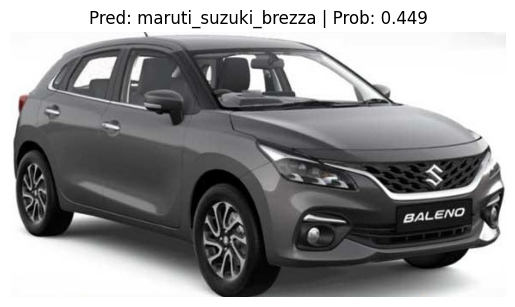

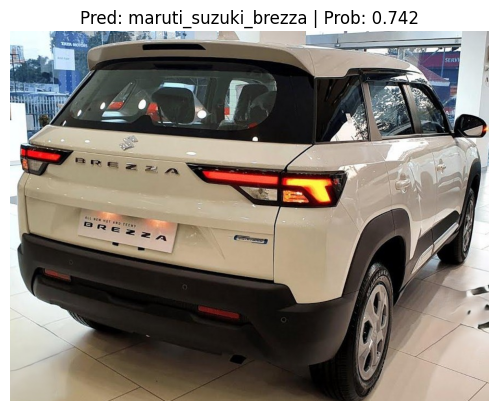

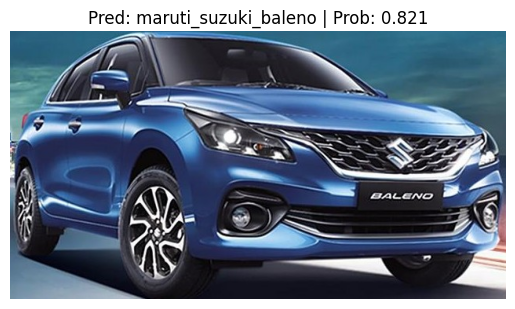

In [145]:
# Get a random list of image paths from test set
import random

from pathlib import Path
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # get list all image paths from test data 
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

# Updated code

d:\AIML And DSA\AI Projects\FastAPI\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Training:   2%|▏         | 1/50 [00:18<15:08, 18.55s/it]

Epoch: 1 | train_loss: 1.0790 | train_acc: 0.5769 | val_loss: 0.8770 | val_acc: 0.6453


Training:   4%|▍         | 2/50 [00:24<08:58, 11.23s/it]

Epoch: 2 | train_loss: 0.5679 | train_acc: 0.8245 | val_loss: 0.4347 | val_acc: 0.8224


Training:   6%|▌         | 3/50 [00:30<06:43,  8.59s/it]

Epoch: 3 | train_loss: 0.3223 | train_acc: 0.9038 | val_loss: 0.2683 | val_acc: 0.9271


Training:   8%|▊         | 4/50 [00:37<06:08,  8.01s/it]

Epoch: 4 | train_loss: 0.1916 | train_acc: 0.9519 | val_loss: 0.3058 | val_acc: 0.9057


Training:  10%|█         | 5/50 [00:43<05:40,  7.56s/it]

Epoch: 5 | train_loss: 0.1257 | train_acc: 0.9712 | val_loss: 0.2185 | val_acc: 0.9375


Training:  12%|█▏        | 6/50 [00:49<05:08,  7.01s/it]

Epoch: 6 | train_loss: 0.1011 | train_acc: 0.9663 | val_loss: 0.2291 | val_acc: 0.9479


Training:  14%|█▍        | 7/50 [00:55<04:38,  6.47s/it]

Epoch: 7 | train_loss: 0.0662 | train_acc: 0.9856 | val_loss: 0.2006 | val_acc: 0.9408


Training:  16%|█▌        | 8/50 [01:00<04:16,  6.10s/it]

Epoch: 8 | train_loss: 0.0582 | train_acc: 0.9784 | val_loss: 0.2054 | val_acc: 0.9479


Training:  18%|█▊        | 9/50 [01:07<04:18,  6.31s/it]

Epoch: 9 | train_loss: 0.0517 | train_acc: 0.9880 | val_loss: 0.2541 | val_acc: 0.9479


Training:  20%|██        | 10/50 [01:14<04:24,  6.61s/it]

Epoch: 10 | train_loss: 0.0717 | train_acc: 0.9712 | val_loss: 0.2168 | val_acc: 0.9408


Training:  22%|██▏       | 11/50 [01:20<04:11,  6.46s/it]

Epoch: 11 | train_loss: 0.0445 | train_acc: 0.9880 | val_loss: 0.2407 | val_acc: 0.9232


Training:  22%|██▏       | 11/50 [01:26<05:07,  7.89s/it]

Epoch: 12 | train_loss: 0.0374 | train_acc: 0.9952 | val_loss: 0.2179 | val_acc: 0.9583
Early stopping at epoch 12


Test Loss: 0.1315 | Test Accuracy: 0.9167


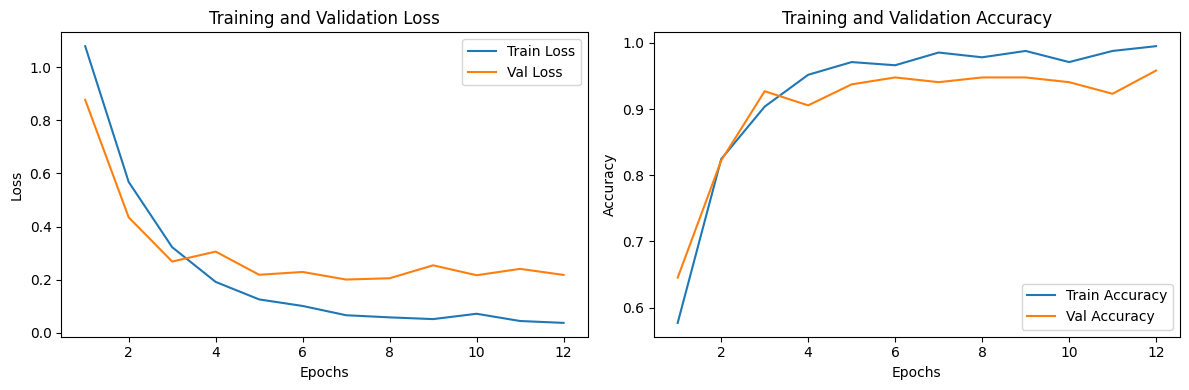

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# 1. Configuration
BATCH_SIZE = 32
NUM_CLASSES = 4
LEARNING_RATE = 0.001  # Adjusted from 0.0001 to allow better convergence
EPOCHS = 50
SEED = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

# 2. Data Preparation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Added for scale variation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_data = datasets.ImageFolder("./dataset/train", transform=train_transform)
val_data = datasets.ImageFolder("./dataset/val", transform=test_transform)
test_data = datasets.ImageFolder("./dataset/test", transform=test_transform)

# Create dataloaders
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# 3. Model Setup
weights = models.EfficientNet_B0_Weights.DEFAULT
model = models.efficientnet_b0(weights=weights).to(device)

# Freeze base layers
for param in model.features.parameters():
    param.requires_grad = False

# Unfreeze last 2 blocks for fine-tuning
for param in model.features[-2:].parameters():
    param.requires_grad = True

# Custom classifier with increased dropout
model.classifier = nn.Sequential(
    nn.Dropout(p=0.5, inplace=True),  # Increased from 0.2 to reduce overfitting
    nn.Linear(in_features=1280, out_features=NUM_CLASSES, bias=True)
).to(device)

# 4. Training Components
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)  # Added weight decay
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5)  # Learning rate scheduler

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# 5. Training Functions
def train_step(model, dataloader, loss_fn, optimizer, device):
    model.train()
    train_loss, train_acc = 0, 0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(y_pred, dim=1) == y).sum().item() / len(y)
    return train_loss / len(dataloader), train_acc / len(dataloader)

def test_step(model, dataloader, loss_fn, device):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y).item()
            test_acc += (torch.argmax(y_pred, dim=1) == y).sum().item() / len(y)
    return test_loss / len(dataloader), test_acc / len(dataloader)

def train(model, train_loader, val_loader, optimizer, loss_fn, epochs, device, early_stopping, scheduler):
    results = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
    for epoch in tqdm(range(epochs), desc="Training"):
        train_loss, train_acc = train_step(model, train_loader, loss_fn, optimizer, device)
        val_loss, val_acc = test_step(model, val_loader, loss_fn, device)
        
        print(f"Epoch: {epoch+1} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | "
              f"val_loss: {val_loss:.4f} | val_acc: {val_acc:.4f}")
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["val_loss"].append(val_loss)
        results["val_acc"].append(val_acc)
        
        scheduler.step(val_loss)
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print(f"Early stopping at epoch {epoch+1}")
            break
    return results

# 6. Visualization Function
def plot_metrics(results):
    epochs = range(1, len(results['train_loss']) + 1)
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, results['train_loss'], label='Train Loss')
    plt.plot(epochs, results['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, results['train_acc'], label='Train Accuracy')
    plt.plot(epochs, results['val_acc'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# 7. Main Execution
if __name__ == "__main__":
    early_stopper = EarlyStopping(patience=5, min_delta=0.001)  # Increased patience
    results = train(model, train_loader, val_loader, optimizer, loss_fn, EPOCHS, device, early_stopper, scheduler)
    
    # Evaluate on test set
    test_loss, test_acc = test_step(model, test_loader, loss_fn, device)
    print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")
    
    # Plot training metrics
    plot_metrics(results)

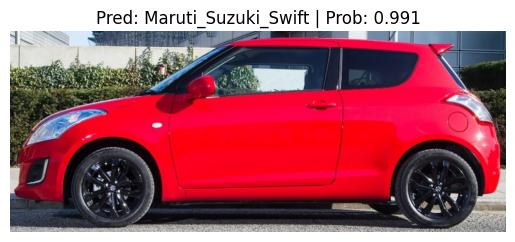

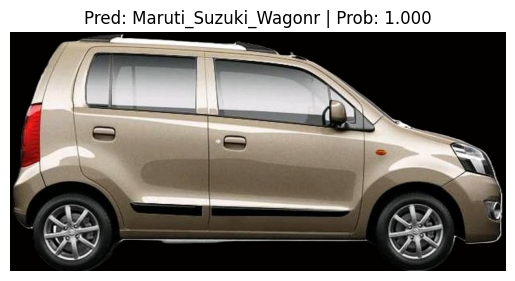

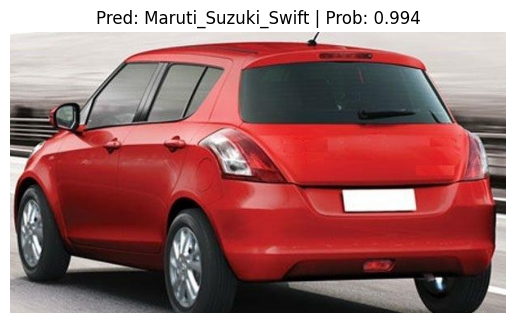

In [16]:
# Get a random list of image paths from test set
import random
test_dir = "./dataset/test"
class_names = train_data.classes

from pathlib import Path
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # get list all image paths from test data 
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))